In [14]:
import numpy as np
import matplotlib.pyplot as plt
from squlearn.feature_map import ChebPQC, YZ_CX_FeatureMap
from squlearn.kernel.matrix import FidelityKernel
from squlearn.util import Executor

xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [15]:
num_qubits = 2
fmap = YZ_CX_FeatureMap(num_qubits, num_features=num_qubits, num_layers=2, c=1.0)
q_kernel = FidelityKernel(
    feature_map=fmap, executor=Executor("statevector_simulator"), parameter_seed=0
)

In [16]:
from squlearn.kernel.ml import QGPC

qgpc_tool = QGPC(quantum_kernel=q_kernel)

In [17]:
qgpc_tool.fit(X, Y)

QGPC(copy_X_train=True, max_iter_predict=100, multi_class='one_vs_rest',
     n_jobs=None, n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
     quantum_kernel=<squlearn.kernel.matrix.fidelity_kernel.FidelityKernel object at 0x000001A31CBF6350>,
     random_state=None)

In [19]:
Z = qgpc_tool.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]

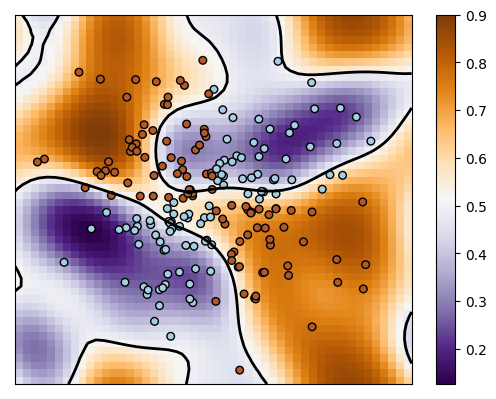

In [20]:
Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.8)
image = plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors=["k"])
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors=(0, 0, 0))
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.colorbar(image)